In [1]:
# Display plots in the notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [28]:
import numpy as np
import pylab as pl
import pandas as pd
import geopandas as gp
import csv
import shapely

# Make plots prettyful
pl.style.use('fivethirtyeight')

In [8]:
shp = gp.GeoDataFrame.from_file('../data/shapefile/nycb2010.shp')

Either a polygon with interior rings, or a polygon with less than 4 points,
or a non-Polygon geometry.  Return arguments as a collection.

Either a polygon with interior rings, or a polygon with less than 4 points,
or a non-Polygon geometry.  Return arguments as a collection.



In [20]:
blocks = shp.groupby(['BoroCode', 'CB2010'])

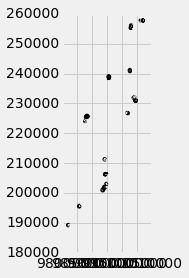

In [57]:
ids = []
geo = []
for block_id, b in blocks:
    b.plot()
    break
    ids.append(block_id), geo.append(shapely.ops.cascaded_union(b['geometry']))

In [42]:
blocks_shp = gp.GeoDataFrame({'block': ids, 'geometry': geo})

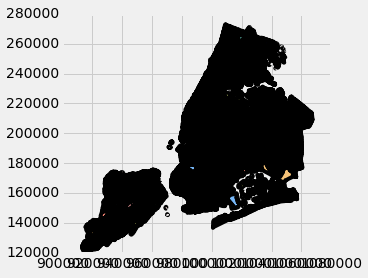

In [33]:
blocks_shp.plot()

In [54]:
print shapely.ops.cascaded_union(blocks_shp['geometry'][100])

POLYGON ((981927.4326171875 200348.7730102539, 981804.0602416992 200139.7803955078, 981698.1384277344 200203.2319946289, 981723.1220092773 200470.157409668, 981927.4326171875 200348.7730102539))


In [55]:
blocks_shp

,block,geometry
0,"(1, 0001)",(POLYGON ((981985.7695922852 189268.4871826172...
1,"(1, 0002)",(POLYGON ((978111.5874023438 188392.2008056641...
2,"(1, 0003)",(POLYGON ((978645.7485961914 188780.5050048828...
3,"(1, 1000)",(POLYGON ((980753.4326171875 191159.2784423828...
4,"(1, 1001)",(POLYGON ((972081.7880249023 190733.4670410156...
5,"(1, 1002)",(POLYGON ((978387.7056274414 188891.8114013672...
6,"(1, 1003)",(POLYGON ((979033.9573974609 191322.4528198242...
7,"(1, 1004)","(POLYGON ((977900.7676391602 189795.44140625, ..."
8,"(1, 1005)",(POLYGON ((979173.4520263672 191421.7731933594...
9,"(1, 1006)",(POLYGON ((979194.9282226563 191635.9689941406...


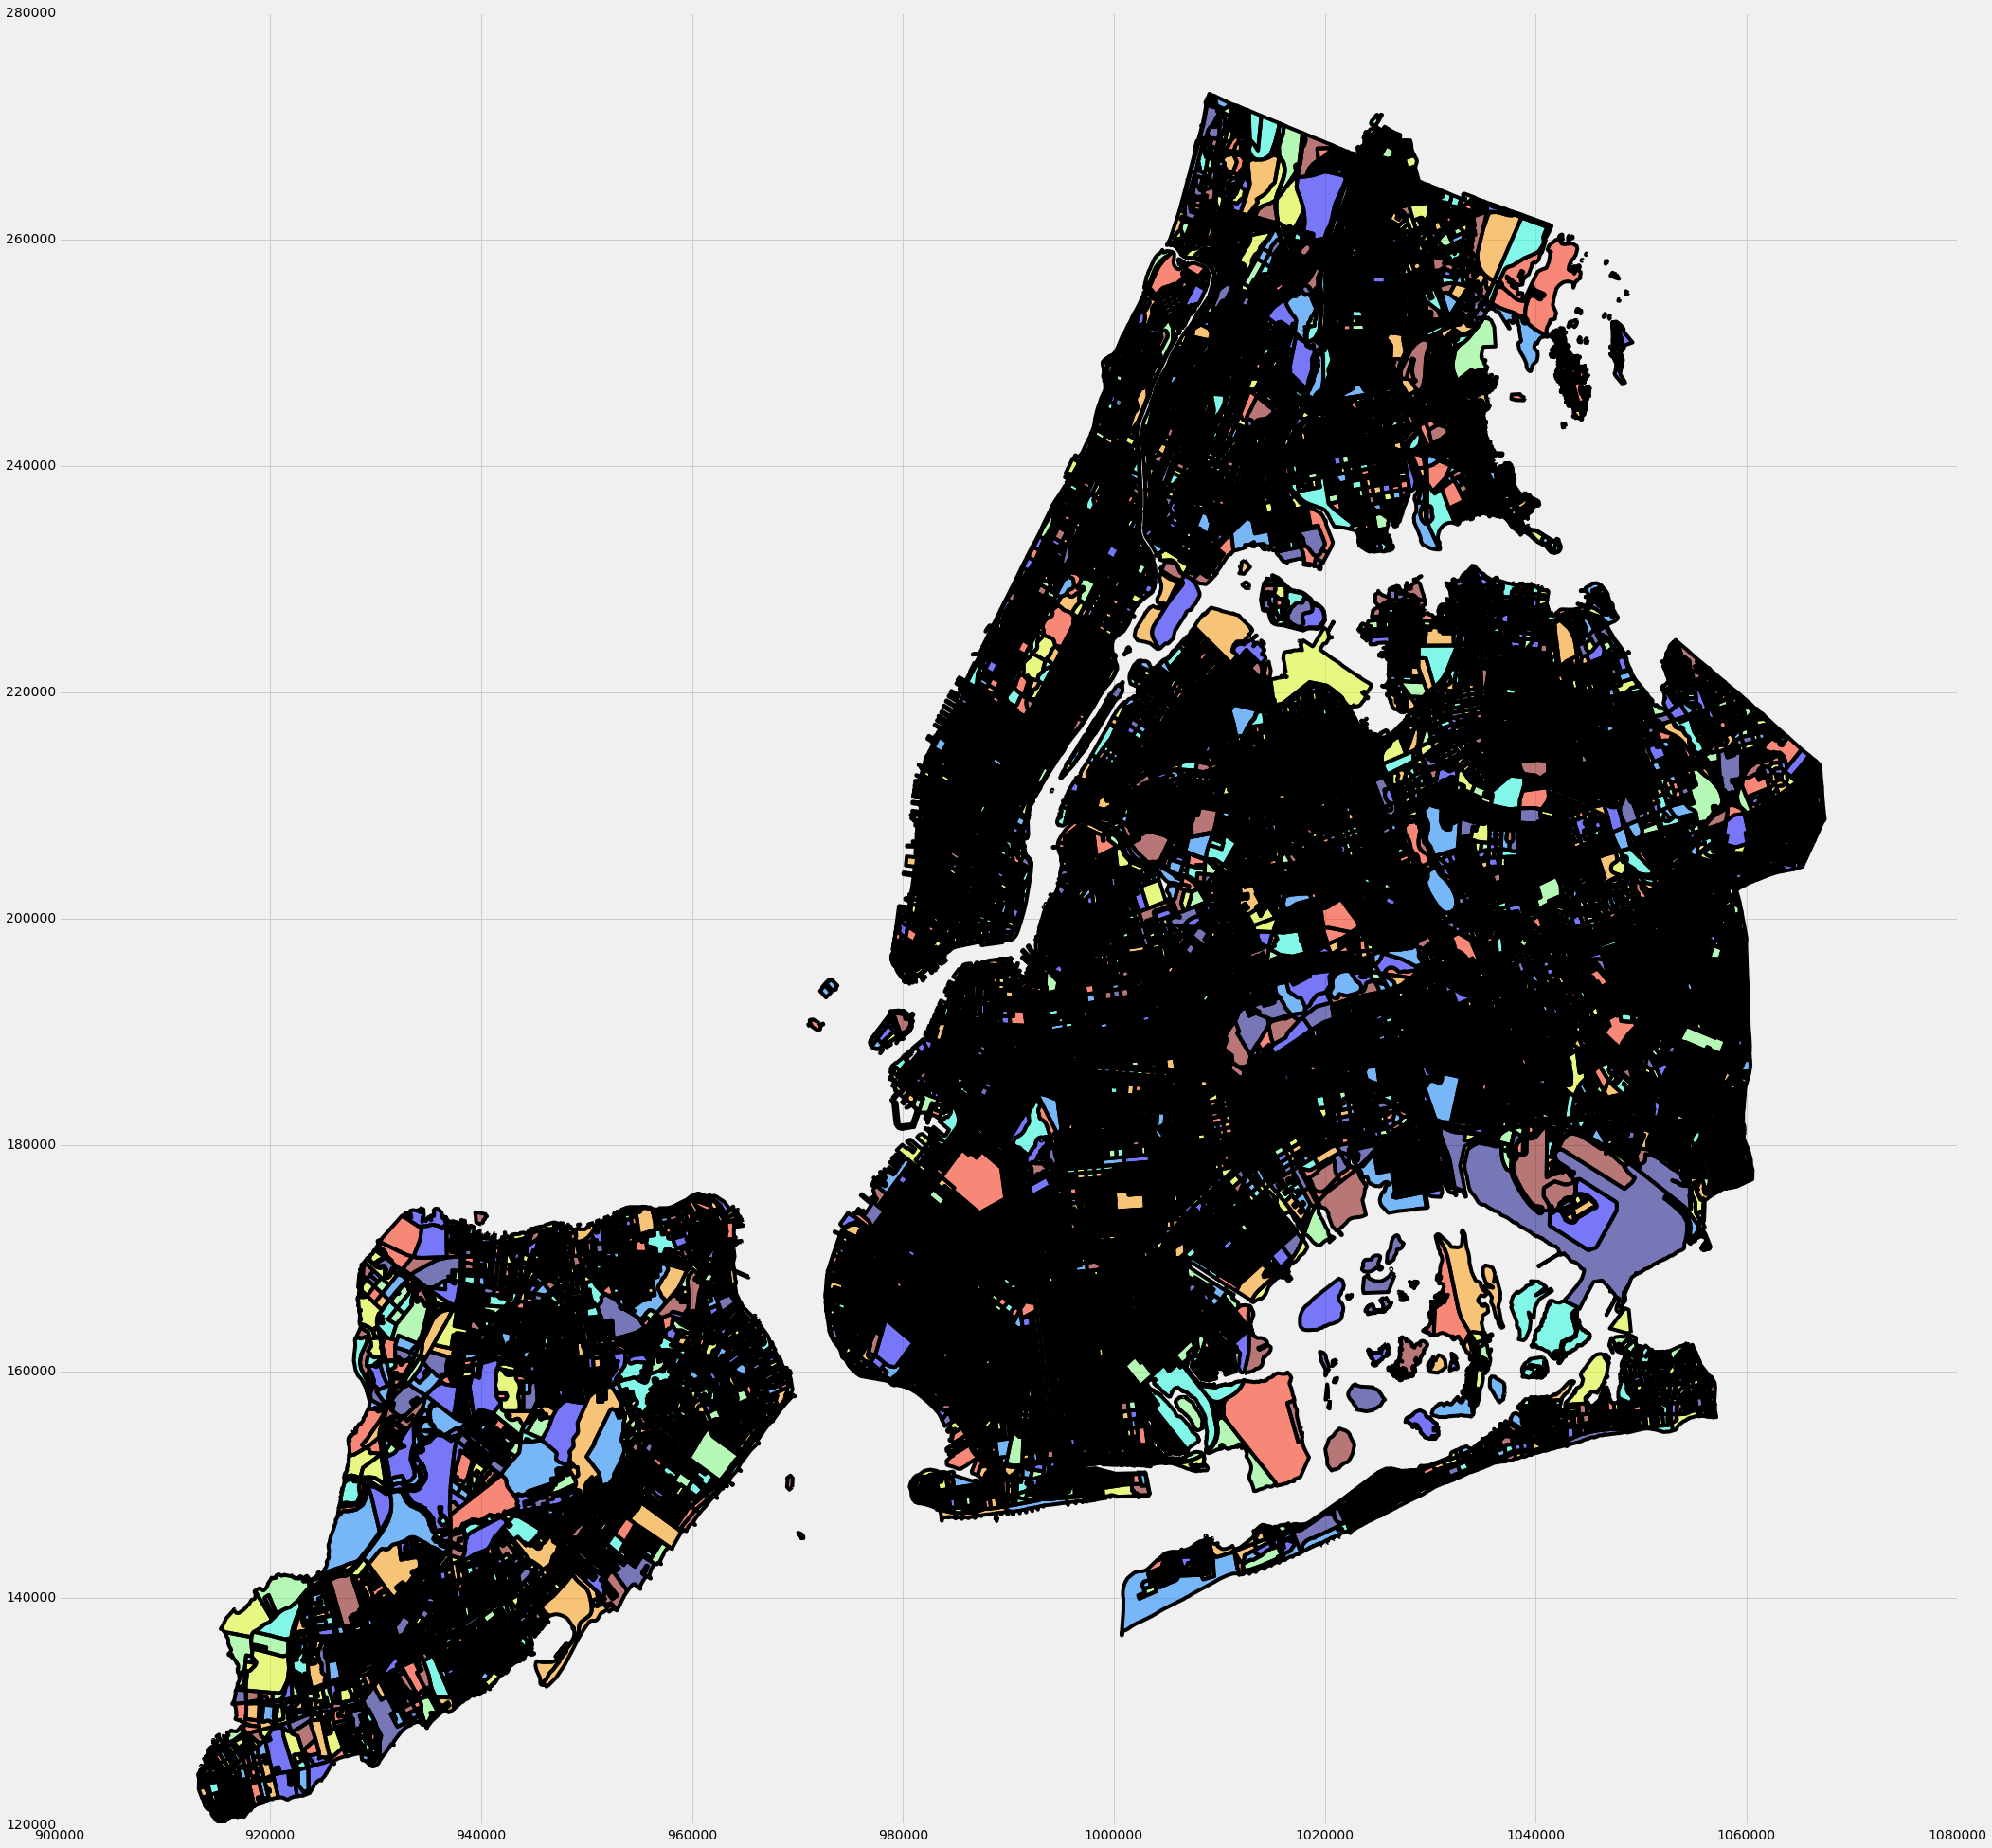

In [56]:
figure, ax = pl.subplots(figsize=(32,32))
shp.plot(axes=ax)

In [58]:
shp

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((962269.1260375977 173705.5001831055,..."
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,"POLYGON ((964642.2676391602 161835.2651977539,..."
2,50027001000,5,Staten Island,1000,002700,150406.784296,1703.381058,"POLYGON ((963363.1166381836 167356.3334350586,..."
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,"POLYGON ((960069.9965820313 161953.6936035156,..."
4,50047001000,5,Staten Island,1000,004700,1058268.032180,5095.163430,"POLYGON ((959303.9877929688 164028.0527954102,..."
5,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,"POLYGON ((963023.891784668 158246.7521972656, ..."
6,50074001000,5,Staten Island,1000,007400,139084.016712,1540.875503,"POLYGON ((965950.5722045898 156723.1069946289,..."
7,50075001000,5,Staten Island,1000,007500,123560.515383,1412.642887,"POLYGON ((960467.2630004883 171221.2073974609,..."
8,50077001000,5,Staten Island,1000,007700,205770.958021,2421.037307,"POLYGON ((960079.5504150391 172579.4725952148,..."
9,50112011000,5,Staten Island,1000,011201,196112.284882,1943.029020,"POLYGON ((960211.8796386719 151958.166015625, ..."
